In [1]:
import math
import random
import csv

In [2]:
# encode the sample data 
def encode_class(mydata):
    classes = []
    # add any new class
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    # add data points
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    print("There are total of", len(classes), "classes, which are ", classes)
    return mydata   

In [3]:
# Splitting the data
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    # initially testset will have all the dataset
    test = list(mydata)
    while len(train) < train_num:
        # index generated randomly from range 0
        # to length of testset
        index = random.randrange(len(test))
        # from testset, pop data rows and put it in train
        train.append(test.pop(index))
    return train, test

In [4]:
# Group the data rows under each class yes or
# no in dictionary eg: dict[yes] and dict[no]
def groupUnderClass(mydata):
      dict = {}
      for i in range(len(mydata)):
          if (mydata[i][-1] not in dict):
              dict[mydata[i][-1]] = []
          dict[mydata[i][-1]].append(mydata[i])
      return dict
 

In [5]:
# Calculating Mean
def mean(numbers):
    return sum(numbers) / float(len(numbers))
 
# Calculating Standard Deviation
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1 + 0.01)
    return math.sqrt(variance)
 

In [6]:
def MeanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    # eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
    # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
    # delete summaries of last class
    del info[-1]
    return info
 
# find Mean and Standard Deviation under each class
def MeanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    for classValue, instances in dict.items():
        info[classValue] = MeanAndStdDev(instances)
    return info

In [7]:
# Calculate Gaussian Probability Density Function
def calculateGaussianProbability(x, mean, stdev):
    if stdev == 0:  # Handle zero standard deviation
        return 1.0 if x == mean else 0.0
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo
 
 
# Calculate Class Probabilities
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

In [8]:
# Make prediction - highest probability is the prediction
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [9]:
# returns predictions for a set of examples
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions
 
# Accuracy score
def accuracy_rate(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0



In [10]:
# add the data path in your system

filename = r'ion_binary_classification.csv'
 
 
# load the file and store it in mydata list
mydata = csv.reader(open(filename, "rt"))
mydata = list(mydata)
mydata = encode_class(mydata)

# List comprehension to remove the first element from each sublist
mydata = [i[1:] for i in mydata]
mydata = mydata[1:]


There are total of 3 classes, which are  ['Class', 'good', 'bad']


In [11]:
# Convert string numbers to float values 
for i in range(len(mydata)):
    mydata[i] = [float(x) for x in mydata[i]]

In [12]:
# split ratio = 0.8
# 70% of data is training data and 30% is test data used for testing
ratio = 0.8
train_data, test_data = splitting(mydata, ratio)
print('Total number of examples are: ', len(mydata))
print('Out of these, training examples are: ', len(train_data))
print("Test examples are: ", len(test_data))
 
# prepare model
info = MeanAndStdDevForClass(train_data)
 
# test model
predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)


Total number of examples are:  351
Out of these, training examples are:  280
Test examples are:  71


In [13]:
from collections import defaultdict

# Calculate the confusion matrix components: TP, FP, FN, TN
def confusion_matrix_components(test, predictions):
    # Initialize counters for each class
    true_positive = defaultdict(int)
    false_positive = defaultdict(int)
    false_negative = defaultdict(int)
    true_negative = defaultdict(int)
    
    for i in range(len(test)):
        actual = test[i][-1]
        predicted = predictions[i]
        
        # True Positive (TP), False Positive (FP), False Negative (FN), True Negative (TN)
        if actual == predicted:
            true_positive[actual] += 1
            for class_value in set(true_positive.keys()).union(false_positive.keys()):
                if class_value != actual:
                    true_negative[class_value] += 1
        else:
            false_positive[predicted] += 1
            false_negative[actual] += 1
            for class_value in set(true_positive.keys()).union(false_positive.keys()):
                if class_value != actual and predicted != class_value:
                    true_negative[class_value] += 1
                    
    return true_positive, false_positive, false_negative, true_negative

# Precision calculation
def precision_score(true_positive, false_positive):
    precisions = {}
    for class_value in true_positive.keys():
        if true_positive[class_value] + false_positive[class_value] == 0:
            precisions[class_value] = 0.0
        else:
            precisions[class_value] = true_positive[class_value] / (true_positive[class_value] + false_positive[class_value])
    return precisions

# Recall calculation
def recall_score(true_positive, false_negative):
    recalls = {}
    for class_value in true_positive.keys():
        if true_positive[class_value] + false_negative[class_value] == 0:
            recalls[class_value] = 0.0
        else:
            recalls[class_value] = true_positive[class_value] / (true_positive[class_value] + false_negative[class_value])
    return recalls

# F1 Score calculation
def f1_score(precision, recall):
    f1_scores = {}
    for class_value in precision.keys():
        if precision[class_value] + recall[class_value] == 0:
            f1_scores[class_value] = 0.0
        else:
            f1_scores[class_value] = 2 * (precision[class_value] * recall[class_value]) / (precision[class_value] + recall[class_value])
    return f1_scores

# Calculate precision, recall, and F1-score for each class
def calculate_metrics(test, predictions):
    tp, fp, fn, tn = confusion_matrix_components(test, predictions)
    precision = precision_score(tp, fp)
    recall = recall_score(tp, fn)
    f1 = f1_score(precision, recall)
    
    # Print results for each class
    for class_value in precision.keys():
        print(f"Class {class_value}:")
        print(f"Precision: {precision[class_value]:.2f}")
        print(f"Recall: {recall[class_value]:.2f}")
        print(f"F1-Score: {f1[class_value]:.2f}")
        print("-" * 30)

# Test the model with the new metrics
accuracy = accuracy_rate(test_data, predictions)
print(f"Accuracy of your model is: {accuracy:.2f}%")

# Print precision, recall, and F1-score
calculate_metrics(test_data, predictions)


Accuracy of your model is: 85.92%
Class 2.0:
Precision: 0.73
Recall: 0.86
F1-Score: 0.79
------------------------------
Class 1.0:
Precision: 0.93
Recall: 0.86
F1-Score: 0.89
------------------------------


##### =================================================
##### Comparision Analysis Implementation with Sk-Learn

In [14]:
# %pip install seaborn
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install scikit-learn

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [16]:
# Load the dataset
file_path = 'ion_binary_classification.csv'
df = pd.read_csv(file_path)

# Drop column 'Unnamed: 0' permanently
df.drop('Unnamed: 0', axis=1, inplace=True)

# Display basic information and the first few rows of the dataset
display(df.head(2))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.0,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.0,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad


In [17]:
# Check for NaN values in the dataset
if df.isnull().values.any():
    print("Data contains NaN values. Please handle them before fitting the model.")
else:
    print("Data is not having Null valuse.")

Data is not having Null valuse.


In [18]:
# Convert the 'Class' column to binary values: 'good' becomes 1, 'bad' becomes 0
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'good' else 0)
X = df.drop(columns=['Class']).values
y = df['Class'].values


In [19]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [20]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [21]:
# Output metrics

print('Accuracy : ', accuracy)
print('Precision : ', precision)
print('Recall : ', recall)
print('F1 : ', f1)
print('\n')
# Output confusion matrix
print('Confusion Matrix : \n', conf_matrix)

Accuracy :  0.8732394366197183
Precision :  0.8541666666666666
Recall :  0.9534883720930233
F1 :  0.9010989010989011


Confusion Matrix : 
 [[21  7]
 [ 2 41]]


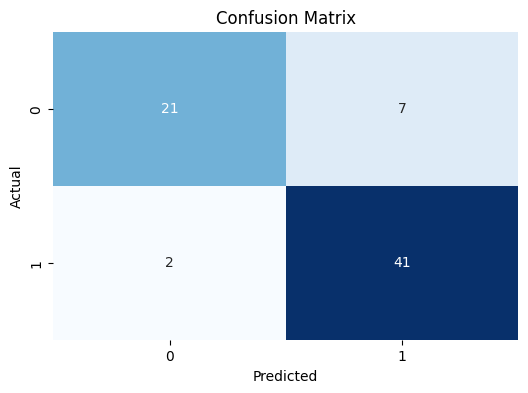

In [22]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()